In [1]:
#%pip install lightgbm

In [64]:
# importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.svm import SVC

In [65]:
#load given data
train = pd.read_csv(r'D:\pyt\Project 6\train.csv')
test = pd.read_csv(r'D:\pyt\Project 6\test_share.csv')

In [66]:
#EDA
train.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received,No-show
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0,No
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0,No
2,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,0,No
3,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0,No
4,9.598513e+13,5626772,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,0,No


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99490 entries, 0 to 99489
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       99490 non-null  float64
 1   AppointmentID   99490 non-null  int64  
 2   ScheduledDay    99490 non-null  object 
 3   AppointmentDay  99490 non-null  object 
 4   SMS_received    99490 non-null  int64  
 5   No-show         99490 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [68]:
train.select_dtypes(['object'])

,ScheduledDay,AppointmentDay,No-show
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,No
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,No
2,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,No
3,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,No
4,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,No
...,...,...,...
99485,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,No
99486,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,No
99487,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,No
99488,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,No


In [69]:
train.tail()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received,No-show
99485,9.969977e+14,5650534,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,1,No
99486,3.635534e+13,5651072,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,1,No
99487,3.596266e+12,5650093,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,1,No
99488,1.557663e+13,5630692,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,1,No
99489,3.775115e+14,5629448,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,1,No


In [70]:
train['No-show'].isnull().sum()

0

In [71]:
train['SMS_received'].unique()

array([0, 1], dtype=int64)

In [72]:
train.nunique()

PatientId         56069
AppointmentID     99490
ScheduledDay      93643
AppointmentDay       27
SMS_received          2
No-show               2
dtype: int64

In [73]:
test.nunique()

PatientId          6230
AppointmentID     10854
ScheduledDay      10677
AppointmentDay       27
SMS_received          2
dtype: int64

In [74]:
# Additional data given--we need to add it in both train and test data
mh=pd.read_csv(r'D:\pyt\Project 6\medical_history.csv')
dd=pd.read_csv(r'D:\pyt\Project 6\demographic_details.csv')

In [75]:
mh.nunique(),dd.nunique()

(PatientId       62299
 Hipertension        2
 Diabetes            2
 Alcoholism          2
 Handcap             5
 dtype: int64,
 PatientId        62299
 Gender               2
 Age                104
 Neighbourhood       81
 Scholarship          2
 dtype: int64)

In [76]:
## comments:
## when you do merging check the data type, always use int or string data type for primary keys
## You can do conversion using below code

In [77]:
mh['PatientId'] = mh['PatientId'].astype('string').str.replace('.0$','', regex=True)
dd['PatientId'] = dd['PatientId'].astype('string').str.replace('.0$','', regex=True)
train['PatientId'] = train['PatientId'].astype('string').str.replace('.0$','', regex=True)
test['PatientId'] = test['PatientId'].astype('string').str.replace('.0$','', regex=True)

In [78]:
#merge the data--
merged = pd.merge(mh,dd, how='outer', on='PatientId')

In [79]:
merged.head()

,PatientId,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship
0,29872499824296,1,0,0,0,F,62,JARDIM DA PENHA,0
1,558997776694438,0,0,0,0,M,56,JARDIM DA PENHA,0
2,4262962299951,0,0,0,0,F,62,MATA DA PRAIA,0
3,867951213174,0,0,0,0,F,8,PONTAL DE CAMBURI,0
4,8841186448183,1,1,0,0,F,56,JARDIM DA PENHA,0


In [80]:
merged.shape, mh.shape, dd.shape

((62299, 9), (62299, 5), (62299, 5))

In [81]:
## Comments: 
## Always check data counts before and after merge

In [82]:
train = pd.merge(merged,train, how='right' ,on='PatientId')
test = pd.merge(merged,test, how='right' ,on='PatientId')

In [83]:
train.shape,test.shape

((99490, 14), (10854, 13))

In [84]:
test.isnull().sum()

PatientId         0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
Gender            0
Age               0
Neighbourhood     0
Scholarship       0
AppointmentID     0
ScheduledDay      0
AppointmentDay    0
SMS_received      0
dtype: int64

In [85]:
train.isnull().sum()

PatientId         0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
Gender            0
Age               0
Neighbourhood     0
Scholarship       0
AppointmentID     0
ScheduledDay      0
AppointmentDay    0
SMS_received      0
No-show           0
dtype: int64

In [86]:
## comments: Please don't create words with having keyword name, all/any is a reserved key word
## If you create objects with those names, your code will break and you will have no clue why?
## these objects are turned green so there is no question of you don't know this, if something comes as green you should never use that name in your code

In [87]:
# Concat train and test data-
train['Data'] = 'train'
test['Data'] = 'test'
alldata = pd.concat([train,test], axis=0)
## Please don't use words like all, they are in green which means they are keywords, please don't override them

In [88]:
#EDA on all data-
alldata['Gender'] = np.where(alldata['Gender']=="M",1,0)

In [89]:
for i in ['ScheduledDay','AppointmentDay']:
    alldata[i]=pd.to_datetime(alldata[i],utc=False)

In [90]:

alldata['gap']=pd.to_numeric(alldata['AppointmentDay']-alldata['ScheduledDay'])
alldata.drop(['AppointmentDay','ScheduledDay'],axis=1,inplace=True)

In [91]:
alldata['No-show']=np.where(alldata['No-show']=='Yes',1,0)

<Axes: >

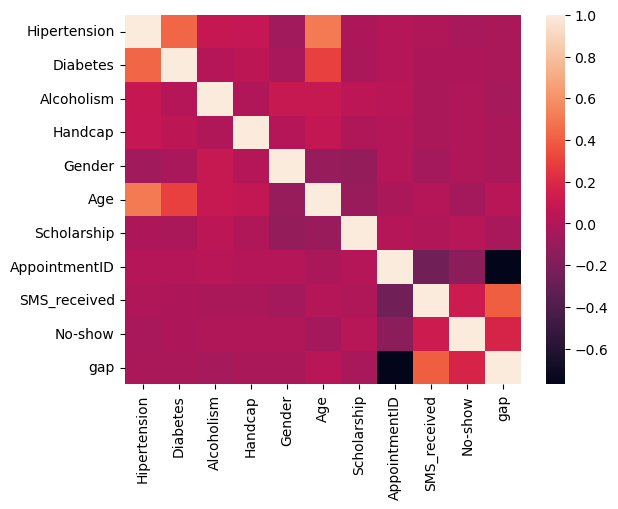

In [92]:
# checking corelation between the features-
sb.heatmap(alldata.corr())

In [93]:
xdumm1 = alldata['Neighbourhood'].value_counts(normalize=True)
np.sum(xdumm1 > .02)
## So need only 18 dummies as per above logic
dummies1 = xdumm1[xdumm1 > .02].index ## these are the ones which you should use as dummies
alldata = alldata.assign(**{
                "newnhood": np.where(alldata.Neighbourhood.isin(dummies1), alldata.Neighbourhood, 'other') 
                 }).drop('Neighbourhood', axis=1)

In [94]:
#concat to all data--
alldata=pd.concat([alldata,pd.get_dummies(alldata.newnhood, drop_first = True)],axis=1)
alldata.drop(['newnhood'],axis=1,inplace=True)

In [95]:
alldata.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [97]:
#split the data into train and test as previous
train1 =alldata[alldata['Data'] =='train']
test1 = alldata[alldata['Data'] =='test']
train1.drop('Data',axis=1,inplace=True)
test1.drop('Data',axis=1,inplace=True)
test1.drop('No-show',axis=1,inplace=True)

In [98]:
test1.head()

,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Scholarship,SMS_received,gap,CARATOÍRA,...,JESUS DE NAZARETH,MARIA ORTIZ,NOVA PALESTINA,RESISTÊNCIA,SANTA MARTHA,SANTO ANDRÉ,SANTO ANTÔNIO,SÃO PEDRO,TABUAZEIRO,other
0,0,0,0,0,0,46,0,0,-38594000000000,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,13,0,1,297044000000000,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,6,0,0,-27031000000000,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,2,0,0,-27465000000000,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,3,1,1,309527000000000,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
import re
train1.columns = [re.sub(r"\W+",'_',item) for item in  train1.columns]

In [101]:
test1.columns = [re.sub(r"\W+",'_',item) for item in  test1.columns]

In [102]:
## check if header's are consistent in both train and test
## empty set means okay
## do this in reverse order as well set(test1.columns) - set(train1.columns)
set(train1.columns) - set(test1.columns)

{'No_show'}

In [103]:
# Model Building---
X=train1.drop(['No_show'],axis=1)
y=train1['No_show']
y.head()


0    0
1    0
2    0
3    0
4    0
Name: No_show, dtype: int32

In [104]:
# Standardising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train=scaler.fit_transform(X)

In [106]:
#checking event rate
y.value_counts()

0    79360
1    20130
Name: No_show, dtype: int64

In [110]:
# Balancing the data
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=2)
X_resample,y_resample = ros.fit_resample(X,y)
from collections import Counter
print(sorted(Counter(y_resample).items()),y_resample.shape)

[(0, 79360), (1, 79360)] (158720,)


In [111]:
# Creating the train test split for given train test data files.
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=.3,random_state=5)

In [42]:
# Model No-1 XGBoost

from xgboost import XGBClassifier
xgb = XGBClassifier()
param = {'n_estimators' : [100,200,300], 'max_depth' : [2,3,4,5,10]}

In [52]:
# Hyperparameter tunning

from sklearn.model_selection import RandomizedSearchCV
xgb_clf = RandomizedSearchCV(xgb, param_distributions = param, cv=5, n_jobs=-1,random_state=25, error_score = 'raise' )

In [53]:
#fitting the model

xgb_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraint...
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=25)

In [55]:
#Creating pickle

import pickle 
pickle.dump(xgb_clf,open('xgb_clf.pkl','wb'))

In [56]:
#Predicting test-

y_pred_xgb = xgb_clf.predict(X_test)

In [57]:
# Validation techniques-

from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report

In [59]:
roc_auc_score(y_test,y_pred_xgb)

0.8069104381763008

In [60]:
confusion_matrix(y_test,y_pred_xgb)

array([[16920,  6861],
       [ 2328, 21507]], dtype=int64)

In [62]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79     23781
           1       0.76      0.90      0.82     23835

    accuracy                           0.81     47616
   macro avg       0.82      0.81      0.81     47616
weighted avg       0.82      0.81      0.81     47616



In [48]:
# predict actual test data by calling pickle
import pickle

pickled_xgb = pickle.load(open('xgb_clf.pkl','rb'))

final_pred = pickled_xgb.predict(test1)

In [53]:
# Saving prediction into csv file
pd.DataFrame(list(zip(test['PatientId'],final_pred)),columns=['PatientId','NO_show']).to_csv('Health_care_No_show_final_2.csv')


In [86]:
# MOdel NO-2 Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
param2 = {'penalty':['l2']}

In [87]:
# Hyperparameter tunning

from sklearn.model_selection import RandomizedSearchCV
log_reg_clf = RandomizedSearchCV(log_reg, param_distributions = param2, cv=5, verbose = 10,random_state=25, error_score = 'raise',n_jobs= -1 )

In [88]:
log_reg_clf.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
                   n_jobs=-1, param_distributions={'penalty': ['l2']},
                   random_state=25, verbose=10)

In [89]:
pickle.dump (log_reg_clf,open('log_reg_clf.pkl','wb'))

In [90]:
#Predicting the output
y_pred2 = log_reg_clf.predict(X_test)

In [91]:
#Validation Tehnique
roc_auc_score(y_pred2,y_test)

0.7281591319975734

In [93]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.42      0.84      0.56     11787
           1       0.92      0.61      0.74     35829

    accuracy                           0.67     47616
   macro avg       0.67      0.73      0.65     47616
weighted avg       0.80      0.67      0.69     47616



In [94]:
confusion_matrix(y_pred2,y_test)

array([[ 9934,  1853],
       [13847, 21982]], dtype=int64)

In [106]:
#Model No-3 LightGBM
#!pip install lightgbm
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
param3 = {'n_estimators':[50,100,150,200,300],'max_depth':[2,5,7,10]}

In [107]:
# Hyperparameter tunning

from sklearn.model_selection import RandomizedSearchCV
lgbm_clf = RandomizedSearchCV(lgb, param_distributions = param3, cv=5, verbose = 10,random_state= 1, error_score = 'raise',n_jobs= -1 )

In [108]:
lgbm_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=LGBMClassifier(),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 5, 7, 10],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300]},
                   random_state=1, verbose=10)

In [109]:
pickle.dump(lgbm_clf,open('lgbm_clf.pkl','wb'))

In [110]:
# Predicting the output
y_pred3 = lgbm_clf.predict(X_test)

In [111]:
#Validation Tehnique
roc_auc_score(y_pred3,y_test)

0.7179336944606369

In [104]:
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.54      0.78      0.64     16535
           1       0.85      0.65      0.74     31081

    accuracy                           0.70     47616
   macro avg       0.70      0.72      0.69     47616
weighted avg       0.74      0.70      0.70     47616



In [112]:
confusion_matrix(y_pred3,y_test)

array([[13174,  3697],
       [10607, 20138]], dtype=int64)

In [114]:
#Model No-4 Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
param4 = {'n_estimators':[50,100,150,200,300],'max_depth':[2,5,7,10],'min_samples_split':[2,4,8]}

In [115]:
# Hyperparameter tunning

from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomizedSearchCV(rfc, param_distributions = param4, cv=5, verbose = 10,random_state= 1, error_score = 'raise',n_jobs= -1 )

In [116]:
rf_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 5, 7, 10],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300]},
                   random_state=1, verbose=10)

In [125]:
import pickle 
pickle.dump(rf_clf,open('rf_clf.pkl','wb'))

NameError: name 'rf_clf' is not defined

In [126]:
import pickle
pickled_y = pickle.load(open('rf_clf.pkl','rb'))
y_pred4 = pickled_y.predict(X_test)

In [127]:
#Validation Tehnique
roc_auc_score(y_pred4,y_test)

0.7154169182066704

In [128]:
confusion_matrix(y_pred4,y_test)

array([[11874,  3059],
       [11907, 20776]], dtype=int64)

In [129]:
print(classification_report(y_pred4,y_test))

              precision    recall  f1-score   support

           0       0.50      0.80      0.61     14933
           1       0.87      0.64      0.74     32683

    accuracy                           0.69     47616
   macro avg       0.69      0.72      0.67     47616
weighted avg       0.75      0.69      0.70     47616



In [112]:
#Model No-5 Gradient Boosting classifier

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
param5 = {'n_estimators':[50,100,150,200,300],'max_depth':[2,5,7,10],'min_samples_split':[2,4,8]}

In [113]:
# Hyperparameter tunning

from sklearn.model_selection import RandomizedSearchCV
gb_clf = RandomizedSearchCV(gbc, param_distributions = param5, cv=5, verbose = 10,random_state= 1, error_score = 'raise',n_jobs= -1 )

In [114]:
gb_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 5, 7, 10],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300]},
                   random_state=1, verbose=10)

In [115]:
pickle.dump(gb_clf,open('gb_clf.pkl','wb'))

In [116]:
y_pred5 = gb_clf.predict(X_test)

In [119]:
#Validation Tehnique
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
roc_auc_score(y_pred5,y_test)

0.7952885263831059

In [121]:
confusion_matrix(y_pred5,y_test)

array([[15303,  2237],
       [ 8478, 21598]], dtype=int64)

In [122]:
print(classification_report(y_pred5,y_test))

              precision    recall  f1-score   support

           0       0.64      0.87      0.74     17540
           1       0.91      0.72      0.80     30076

    accuracy                           0.77     47616
   macro avg       0.77      0.80      0.77     47616
weighted avg       0.81      0.77      0.78     47616



In [ ]:
## final comment--> We can select xgb or gradient boosting for this project coz roc_auc score is aout 80% in both algorithms.